### Model Deployment: YOLOv8n op nieuwe afbeeldingen

In deze notebook gebruiken we een getraind YOLOv8n om objecten te detecteren in **nieuwe, ongeziene geveltekeningen**.



Deze notebook is bedoeld om het model toe te passen in de praktijk, los van het trainingsproces.


In [3]:
# 📦 Benodigde imports
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
from PIL import Image




image 1/1 C:\Users\moham\Nest-Project\AI_generated_facades\facade.jpg: 640x640 1 facade, 4 windows, 246.9ms
Speed: 19.9ms preprocess, 246.9ms inference, 28.5ms postprocess per image at shape (1, 3, 640, 640)


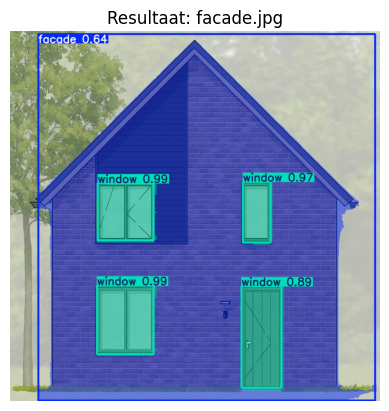

image 1/1 C:\Users\moham\Nest-Project\AI_generated_facades\facade1.jpg: 480x640 1 facade, 1 tree, 8 windows, 145.2ms
Speed: 2.6ms preprocess, 145.2ms inference, 8.3ms postprocess per image at shape (1, 3, 480, 640)


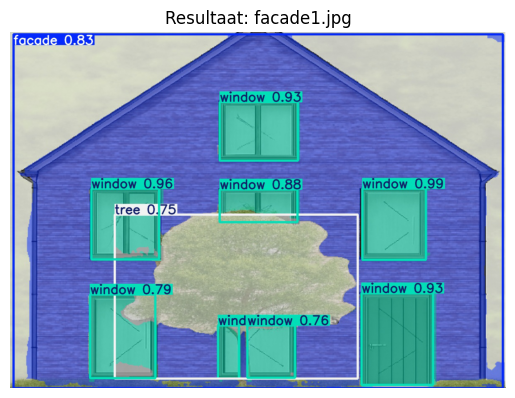

image 1/1 C:\Users\moham\Nest-Project\AI_generated_facades\facade2.jpg: 640x640 1 facade, 4 windows, 101.4ms
Speed: 3.4ms preprocess, 101.4ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)


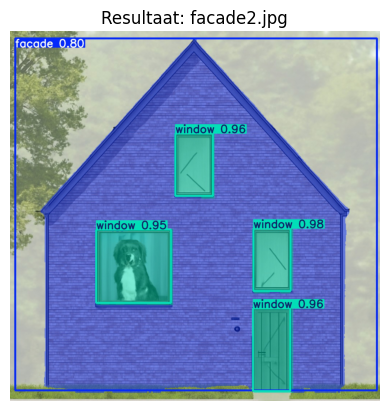

image 1/1 C:\Users\moham\Nest-Project\AI_generated_facades\facade3.jpg: 640x640 2 facades, 1 roof, 2 trees, 6 windows, 97.0ms
Speed: 3.7ms preprocess, 97.0ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 640)


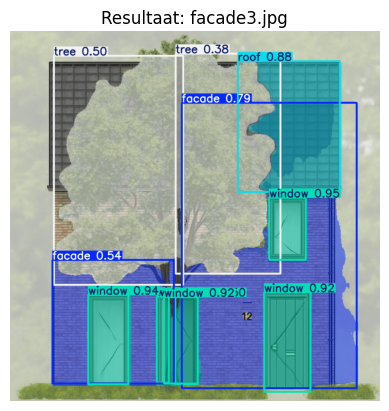

image 1/1 C:\Users\moham\Nest-Project\AI_generated_facades\facade4.jpg: 640x640 1 facade, 4 windows, 94.0ms
Speed: 3.5ms preprocess, 94.0ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)


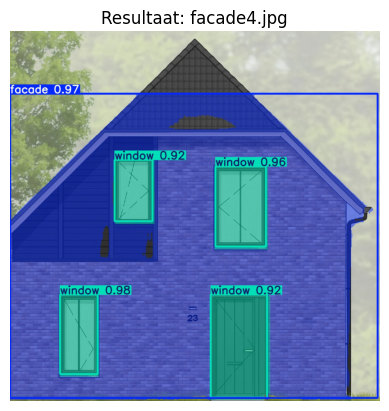

In [8]:
# 🔧 Pad naar jouw getrainde model (.pt-bestand)
model_path = r"C:\Users\moham\Nest-Project\yolovn50ep.pt"
model = YOLO(model_path)

# 📂 Map met nieuwe afbeeldingen om op te testen
input_folder = r"C:\Users\moham\Nest-Project\AI_generated_facades"

# 📁 Map om resultaten op te slaan
output_folder = r"C:\Users\moham\CLONED\Nest-Project\Nest-Project\output_resultaten"
os.makedirs(output_folder, exist_ok=True)

# 🔄 Verwerk elke afbeelding in de inputmap
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(input_folder, filename)

        # 🔍 Voorspelling uitvoeren
        results = model.predict(source=image_path, save=False)

        # 💾 Resultaat opslaan
        save_path = os.path.join(output_folder, f"result_{filename}")
        results[0].save(filename=save_path)

        # 📸 Resultaat weergeven in notebook
        img = Image.open(save_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Resultaat: {filename}")
        plt.show()

### ✅ Conclusie

Het YOLOv8-model presteert verrassend goed, zeker gezien de beperkte hoeveelheid trainingsdata (slechts ±60 afbeeldingen).
Ondanks deze kleine dataset is het model in staat om belangrijke objectklassen zoals ramen, gevels en daken te detecteren ook in complexere testbeelden zoals *Rijwoning 6*.

